In [85]:
import pandas as pd
import json

# Lee el archivo CSV en un DataFrame de Pandas
df = pd.read_csv('E:\hENRYDATASEMANAS\lab1\movies_dataset_modificado.csv', low_memory=False)


In [14]:

print(df.columns)

Index(['budget', 'id', 'original_language', 'overview', 'popularity',
       'release_date', 'revenue', 'runtime', 'status', 'tagline', 'title',
       'vote_average', 'id_collection', 'name_collection',
       'poster_path_collection', 'backdrop_path_collection', 'id_Genres',
       'name_Genres', 'name_production_companies', 'id_production_companies',
       'name_production_countries', 'iso_3166_1_production_countries',
       'name_spoken_languages', 'iso_639_1_spoken_languages', 'release_year',
       'release_month', 'release _day', 'return'],
      dtype='object')


In [5]:
import pandas as pd

def peliculas_mes(mes):
    # cargar el conjunto de datos
        
    # seleccionar las filas que corresponden al mes dado
    df_mes = df[df['release_month'] == mes]
    
    # contar la cantidad de filas
    respuesta = len(df_mes)
    
    # retornar la cantidad
    return print('mes', mes , 'cantidad', respuesta)

print(peliculas_mes("Marzo"))

mes Marzo cantidad 3553
None


In [9]:
import pandas as pd

def peliculas_dia(dia):
    # cargar el conjunto de datos
        
    # seleccionar las filas que corresponden al mes dado
    df_dia = df[df['release _day'] == dia]
    
    # contar la cantidad de filas
    respuesta = len(df_dia)
    
    # retornar la cantidad
    return {'dia':dia, 'cantidad':respuesta}



In [18]:
def franquicia(franquicia):
    
    
    # seleccionar las filas que corresponden a la franquicia dada
    df_franquicia = df[df['name_collection'] == franquicia]
    
    # contar la cantidad de películas
    cantidad = len(df_franquicia)
    
    # calcular la ganancia total y promedio
    ganancia_total = df_franquicia['revenue'].sum()
    ganancia_promedio = df_franquicia['revenue'].mean()
    
    # retornar un diccionario con los resultados
    return {'franquicia':franquicia, 'cantidad':cantidad, 'ganancia_total':ganancia_total, 'ganancia_promedio':ganancia_promedio}

In [37]:
def peliculas_pais(pais):
   
    
    df_pais = df[df['name_production_countries'].apply(lambda x: pais in x if pd.notna(x) else False)]
    
    # contar la cantidad de películas
    cantidad = len(df_pais)
    
    # retornar un diccionario con los resultados
    return {'pais':pais, 'cantidad':cantidad}

In [42]:
def productoras(productora):
   

    # seleccionar las filas que contienen la productora dada en la lista de productoras
    df_productora = df[df['name_production_companies'].apply(lambda x: productora in x if pd.notna(x) else False)]

    # calcular la ganancia total y la cantidad de películas producidas
    ganancia_total = df_productora['revenue'].sum()
    cantidad = len(df_productora)

    # retornar un diccionario con los resultados
    return {'productora':productora, 'ganancia_total':ganancia_total, 'cantidad':cantidad}

In [58]:
def retorno(pelicula):
    
    # seleccionar la fila correspondiente a la película dada
    df_pelicula = df[df['title'] == pelicula]
    
    # obtener los valores de inversión, ganancia , año de lanzamiento retorno
    inversion = df_pelicula['budget'].values[0]
    ganancia = df_pelicula['revenue'].values[0]
    anio = df_pelicula['release_year'].values[0]
    retorno = df_pelicula['return'].values[0]
    
    
    return {'pelicula': pelicula, 'inversion': inversion, 'ganacia': ganancia, 'retorno': retorno, 'anio': anio}

In [139]:
df = pd.read_csv('E:\hENRYDATASEMANAS\lab1\movies_dataset_modificado.csv', low_memory=False)
import ast

def recomendacion(titulo):
    # Filtrar películas con status "released" y name_Genres no vacío
    df['name_Genres'] = df['name_Genres'].iloc[0]
    df['name_Genres'] = df['name_Genres'].apply(ast.literal_eval)
    df['name_Genres']
    
    # Filtrar películas que no sean la película de entrada y que tengan al menos un género en común
    pelicula_entrada = df[df['title'] == titulo]
    generos_entrada = pelicula_entrada['name_Genres'].iloc[0]
    generos_entrada = ast.literal_eval(generos_entrada)
    df1 = df[(df['title'] != titulo) &
                              (df['name_Genres'].apply(lambda x: bool(set(x) & generos_entrada)))]
    
    # Ordenar por calificación promedio
    df2 = df1.sort_values('vote_average', ascending=False)
    
    # Seleccionar las 5 películas con más géneros en común
    recomendacion = []
    for i, row in df2.iterrows():
        generos_row = set(row['name_Genres'])
        if len(recomendacion) >= 5:
            break
        if len(generos_entrada & generos_row) > 0:
            recomendacion.append(row['title'])
    
    return {'lista recomendada': recomendacion}
    
  


In [5]:
import pandas as pd

In [21]:
df = pd.read_csv('E:\hENRYDATASEMANAS\lab1\movies_dataset_modificado.csv', low_memory=False)

def recomendacion(titulo):
    
    # Filtrar películas con status "released" y name_Genres no vacío
    df1 = df[(df['status'] == 'Released') & (df['name_Genres'].apply(lambda x: len(x) > 0))]
    
    # Obtener los géneros de la película de entrada
    pelicula_entrada = df1[df1['title'] == titulo]
    generos_entrada = set(pelicula_entrada['name_Genres'].iloc[0])
    
    # Calcular la cantidad de géneros en común con cada una de las otras películas
    df1['num_generos_en_comun'] = df1['name_Genres'].apply(lambda x: len(set(x) & generos_entrada))
    
    # Ordenar el dataframe por la cantidad de géneros en común en orden descendente y luego por la calificación en orden descendente
    df1 = df1.sort_values(by=['num_generos_en_comun', 'vote_average'], ascending=False)
    
    # Devolver los títulos de las 5 películas con mayor calificación en orden descendente
    lista = df1['title'].head(5).tolist()
    return lista

In [22]:
recomendacion('Grumpier Old Men')

C:\Users\tonto\AppData\Local\Temp\ipykernel_7348\4138743215.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['num_generos_en_comun'] = df1['name_Genres'].apply(lambda x: len(set(x) & generos_entrada))


['Chilly Scenes of Winter',
 'The Misadventures of Margaret',
 'The Taming of the Shrew',
 'A Ticklish Affair',
 'Looking for Maria Sanchez']

In [ ]:
if pelicula_entrada.empty:
    return {'lista recomendada': []}


In [88]:
print(df.columns)

Index(['budget', 'id', 'original_language', 'overview', 'popularity',
       'release_date', 'revenue', 'runtime', 'status', 'tagline', 'title',
       'vote_average', 'id_collection', 'name_collection',
       'poster_path_collection', 'backdrop_path_collection', 'id_Genres',
       'name_Genres', 'name_production_companies', 'id_production_companies',
       'name_production_countries', 'iso_3166_1_production_countries',
       'name_spoken_languages', 'iso_639_1_spoken_languages', 'release_year',
       'release_month', 'release _day', 'return'],
      dtype='object')


In [200]:
print(df['title'])


0                          Toy Story
1                            Jumanji
2                   Grumpier Old Men
3                  Waiting to Exhale
4        Father of the Bride Part II
                    ...             
45461                         Subdue
45462            Century of Birthing
45463                       Betrayal
45464               Satan Triumphant
45465                       Queerama
Name: title, Length: 45466, dtype: object


In [61]:
pelicula_entrada = df.loc[df['title'] == 'Three Colors: Red']

In [62]:
generos_entrada = set(pelicula_entrada['name_Genres'].iloc[0])

In [63]:
generos_entrada

{' ',
 "'",
 ',',
 'D',
 'M',
 'R',
 '[',
 ']',
 'a',
 'c',
 'e',
 'm',
 'n',
 'o',
 'r',
 's',
 't',
 'y'}

In [42]:
type(df.at[2,"name_Genres"])

str

In [19]:
import ast


df['name_Genres'] = df['name_Genres'].iloc[0]
df['name_Genres'] = df['name_Genres'].apply(ast.literal_eval)


In [24]:
df['name_Genres'].value_counts()

['Drama']                                       5000
['Comedy']                                      3621
['Documentary']                                 2723
[]                                              2442
['Drama', 'Romance']                            1301
                                                ... 
['Action', 'Drama', 'Comedy', 'Documentary']       1
['War', 'Drama', 'History', 'Thriller']            1
['Horror', 'Drama', 'History', 'Thriller']         1
['Comedy', 'Crime', 'Action', 'Drama']             1
['Family', 'Animation', 'Romance', 'Comedy']       1
Name: name_Genres, Length: 4069, dtype: int64

In [60]:
pelicula_entrada = df[df['title'] == 'Three Colors: Red']
generos_entrada = set(pelicula_entrada['name_Genres'].iloc[0])
generos_entrada

{' ',
 "'",
 ',',
 'D',
 'M',
 'R',
 '[',
 ']',
 'a',
 'c',
 'e',
 'm',
 'n',
 'o',
 'r',
 's',
 't',
 'y'}

In [ ]:
def find_similar_titles(data, title, n):
    """
    Encuentra los n títulos con más géneros en común con un título dado.

    Parameters:
    data (pandas.DataFrame): Un DataFrame que contiene las columnas "titulos" y "generos".
    title (str): El título para el cual se desean encontrar los títulos similares.
    n (int): El número de títulos similares que se desean obtener.

    Returns:
    Una lista con los títulos que tienen más géneros en común con el título dado.
    """
    from collections import Counter

    # Obtener la lista de géneros del título dado.
    title_genres = [genre for genre in data.loc[data['title'] == title, 'name_Genres'].values[0]]

    # Crear un diccionario para contar la cantidad de géneros compartidos entre los títulos.
    shared_genres = {}
    for i, row in data.iterrows():
        if row['title'] == title:
            continue
        genres = row['name_Genres']
        for genre in genres:
            if genre not in shared_genres:
                shared_genres[genre] = {}
            if row['title'] not in shared_genres[genre]:
                shared_genres[genre][row['title']] = 0
            shared_genres[genre][row['title']] += 1

    # Ordenar los títulos por cantidad de géneros compartidos.
    common_titles = []
    for t in shared_genres.keys():
        title_score = sum(shared_genres[t][title] for t_genre in title_genres if t_genre in shared_genres[t])
        common_titles.append((t, title_score))
    common_titles.sort(key=lambda x: x[1], reverse=True)

    # Retornar los títulos con mayor cantidad de géneros compartidos.
    return [title[0] for title in common_titles[:n]]




In [38]:
type(df.at[9,'name_Genres'])

str

In [34]:
df['name_Genres'] = df['name_Genres'].replace('[]', None)

In [37]:
df[["title",'name_Genres']]

,title,name_Genres
0,Toy Story,"['Animation', 'Comedy', 'Family']"
1,Jumanji,"['Adventure', 'Fantasy', 'Family']"
2,Grumpier Old Men,"['Romance', 'Comedy']"
3,Waiting to Exhale,"['Comedy', 'Drama', 'Romance']"
4,Father of the Bride Part II,['Comedy']
...,...,...
45461,Subdue,"['Drama', 'Family']"
45462,Century of Birthing,['Drama']
45463,Betrayal,"['Action', 'Drama', 'Thriller']"
45464,Satan Triumphant,None


In [90]:
import pandas as pd
df = pd.read_csv('E:\hENRYDATASEMANAS\lab1\movies_dataset_modificado.csv', low_memory=False)


In [91]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df2 = df[["title","name_Genres", "name_Genres_str",'vote_average']]
df2 = df2.dropna(subset=['name_Genres'])
df2 = df2.dropna(subset=['name_Genres_str'])
def recomendar_peliculas(title):
    df1 = df.sample(n=10000)
    df1 = df1.dropna(subset=["id_Genres"])
    df1 = df1.dropna(subset=['name_Genres_str'])
    
    # seleccionar la fila correspondiente al título
    movie_row = df[df['title'] == title]
    
    # obtener los géneros de la película
    genres_str = movie_row['name_Genres_str'].values[0]
    genres_list = movie_row['name_Genres']  # COMPARAMOS LA LISTA 
    
    # crear una matriz de géneros
    cv = CountVectorizer()
    genres_matrix = cv.fit_transform(df1['name_Genres_str'])
    
    # calcular la similitud entre los géneros de la película y las demás películas
    cosine_sim = cosine_similarity(genres_matrix)
    movie_index = movie_row.index[0]
    sim_scores = list(enumerate(cosine_sim[movie_index]))
    
    # ordenar las películas por similitud
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=False)
    sim_scores = sim_scores[1:6]  # seleccionar las 5 películas más similares

        
    # obtener los títulos de las películas similares
    movie_indices = [i[0] for i in sim_scores]
    similar_movies = df1[['title','vote_average']].iloc[movie_indices].values.tolist()
    similar_movies_sorted = sorted(similar_movies, key=lambda x: x[1], reverse=True)

     
    
    return similar_movies_sorted

In [92]:
recomendar_peliculas("Toy Story")

[["Don't Think I've Forgotten: Cambodia's Lost Rock and Roll", 8.7],
 ['Valhalla', 6.9],
 ['Scooby-Doo! Frankencreepy', 6.7],
 ['Christmas Every Day', 5.8],
 ['Born To Race', 5.5]]

In [85]:
pelicula_entrada = df.loc[df['title'] == "Star Trek: The Motion Picture"]
generos_entrada = pelicula_entrada['name_Genres_str'].values[0]

generos_entrada

'Science Fiction, Adventure, Mystery'

In [83]:

    
# seleccionar la fila correspondiente al título
movie_row = df2[df2['title'] == "Toy Story"]
    
# obtener los géneros de la película
genres_str = movie_row["id_Genres"].values[0]

genres_str

cv = CountVectorizer()
genres_matrix = cv.fit_transform(df2['name_Genres'])
print(genres_matrix)

  (0, 2)	1
  (0, 7)	1
  (0, 13)	1
  (1, 13)	1
  (1, 1)	1
  (1, 14)	1
  (2, 7)	1
  (2, 33)	1
  (3, 7)	1
  (3, 33)	1
  (3, 11)	1
  (4, 7)	1
  (5, 11)	1
  (5, 0)	1
  (5, 9)	1
  (5, 40)	1
  (6, 7)	1
  (6, 33)	1
  (7, 13)	1
  (7, 1)	1
  (7, 11)	1
  (7, 0)	1
  (8, 1)	1
  (8, 0)	1
  (8, 40)	1
  :	:
  (43012, 7)	1
  (43012, 14)	1
  (43013, 10)	1
  (43014, 11)	1
  (43014, 9)	1
  (43014, 40)	1
  (43015, 7)	1
  (43015, 11)	1
  (43016, 40)	1
  (43016, 22)	1
  (43016, 27)	1
  (43017, 22)	1
  (43017, 27)	1
  (43018, 22)	1
  (43019, 34)	1
  (43019, 15)	1
  (43020, 33)	1
  (43020, 11)	1
  (43020, 0)	1
  (43021, 13)	1
  (43021, 11)	1
  (43022, 11)	1
  (43023, 11)	1
  (43023, 0)	1
  (43023, 40)	1


In [3]:
import pandas as pd
df = pd.read_csv('E:\hENRYDATASEMANAS\lab1\movies_dataset_modificado.csv', low_memory=False)

df2 = df[["title","name_Genres", "name_Genres_str",'vote_average']]
df2 = df2.dropna(subset=['name_Genres'])
df2 = df2.dropna(subset=['name_Genres_str'])
df2 = df2.dropna(subset=['title'])
df2['title'] = df2['title'].astype(str)

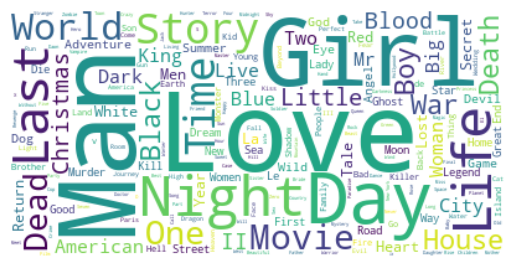

In [4]:
from wordcloud import WordCloud

text = ' '.join(df2['title'].values)
wordcloud = WordCloud(background_color='white').generate(text)

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [5]:
from sklearn.metrics.pairwise import pairwise_distances

# Cree una matriz de distancias por pares entre todas las películas en función de sus calificaciones
movie_similarity = 1 - pairwise_distances(df2.pivot_table(index='title', values='vote_average').fillna(0), metric='cosine')

MemoryError: Unable to allocate 11.9 GiB for an array with shape (40035, 40035) and data type float64

In [27]:
import numpy as np

def get_movie_recommendations(movie_title):

    df1 = df2.sample(n=10000)
    # Obtenga el índice de la película en la similarity matrix 
    
    movie_similarity = 1 - pairwise_distances(df1.pivot_table(index='title',columns='name_Genres', values='vote_average').fillna(0), metric='cosine')
    movie_index = df2[df2['title'] == movie_title].index[0]

    # Get the similarity scores for all movies compared to the given movie
    similarity_scores = movie_similarity[movie_index]

    # Sort the scores from highest to lowest
    similar_movie_indices = np.argsort(-similarity_scores)

    # Obtén las mejores películas más similares
    top_movie_indices = similar_movie_indices[1:6]

    # Obtén los títulos de las mejores películas más similares
    top_movie_titles = [df2.iloc[index]['title'] for index in top_movie_indices]

    return top_movie_titles


In [29]:
get_movie_recommendations("Toy Story")

['Lord Jim',
 'The Purple Rose of Cairo',
 "Alice Doesn't Live Here Anymore",
 'The Cookout',
 'One Hundred and One Dalmatians']

In [31]:
pelicula_entrada = df.loc[df['title'] == 'The Cookout']
generos_entrada = pelicula_entrada['name_Genres_str'].values[0]

generos_entrada

'Comedy, Drama'